In [1]:
import sys
sys.path.append("../src_code/")

In [2]:
sys.path

['',
 '/anaconda3/lib/python36.zip',
 '/anaconda3/lib/python3.6',
 '/anaconda3/lib/python3.6/lib-dynload',
 '/anaconda3/lib/python3.6/site-packages',
 '/anaconda3/lib/python3.6/site-packages/aeosa',
 '/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/sainikhilmaram/.ipython',
 '../src_code/']

In [3]:
import employee
import config as cfg
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import misc

## Employees present in Trader Book Account but not in Employee Master

In [23]:
account_to_employee_dict,employee_to_account_dict = employee.map_employee_account(cfg.TRADER_BOOK_ACCOUNT_FILE)

In [24]:
emp_dict = employee.get_emplpoyees_from_file(cfg.EMPLOYEE_MASTER_FILE)

In [25]:
employee_list = emp_dict.keys()
employee_account_list = employee_to_account_dict.keys()

In [26]:
## Employees not present in employee list but has accounts.
list(set(employee_account_list) - set(employee_list))

['salzman_glen', 'bennett_geoff', 'chalson_jeff', 'narayan_mahesh']

## Plots number of postive to negative messages

In [6]:
df = pd.read_csv(cfg.SENTIMENT_PERSONAL+"/im_df_week250.csv")

In [9]:
def sentiment_ratio(df):
    num_positive_messages = len(df[df["sentiment"] == 1])
    num_negative_messages = len(df[df["sentiment"] == -1])
    num_zero_messages = len(df[df["sentiment"] == 0])
#     ratio = (num_positive_messages+num_zero_messages)/(num_negative_messages+1)
    ratio = (num_positive_messages)/(num_negative_messages+1)
    return ratio


In [10]:
sentiment_ratio(df)

2.481746370623399

In [13]:
def plot_sentiment_ratio(dir_path):
    sentiment_ratio_list = []
    week_list = range(0,265)
    for (dirpath, dirnames, filenames) in os.walk(dir_path):
        for filename in filenames:
#             print(filename)
            if filename.startswith("im_df"):
                df = pd.read_csv(dir_path + "/" + filename)
                sentiment_ratio_list.append(sentiment_ratio(df))
    return sentiment_ratio_list, week_list
            

In [14]:
sentiment_ratio_list, week_list = plot_sentiment_ratio(cfg.SENTIMENT_BUSINESS)

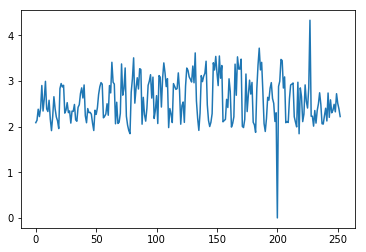

In [16]:
plt.plot(range(253),sentiment_ratio_list)
plt.show()

In [17]:
sentiment_ratio_list, week_list = plot_sentiment_ratio(cfg.SENTIMENT_PERSONAL)

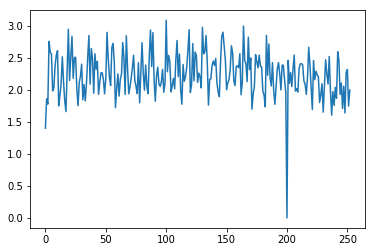

In [18]:
plt.plot(range(253),sentiment_ratio_list)
plt.show()

## Print dates in each file

In [41]:
def print_dates_in_weekly_im(dir_path):
    sentiment_ratio_list = []
    file_name_list = []
    for (dirpath, dirnames, filenames) in os.walk(dir_path):
        for filename in filenames:
            if filename.startswith("im_df"):
                file_name_list.append(filename)
#     f = lambda x: int(x.split('.')[0].split('_')[-1][4:]
    file_name_list = sorted(file_name_list,key=lambda x: int(x.split('.')[0].split('_')[-1][4:]))
    for filename in file_name_list:
        week_num = int(filename.split('.')[0].split('_')[-1][4:])
        df = pd.read_csv(dir_path + "/" + filename)
        df_daily_dict = misc.df_week_df_day(df)
        print("Week Num : {0}, Dates: {1}".format(week_num,df_daily_dict.keys()))
        

In [42]:
print_dates_in_weekly_im(cfg.SENTIMENT_BUSINESS)

Week Num : 0, Dates: dict_keys(['08-03-2006', '08-04-2006', '08-05-2006', '08-06-2006'])
Week Num : 1, Dates: dict_keys(['08-07-2006', '08-08-2006', '08-09-2006', '08-10-2006'])
Week Num : 2, Dates: dict_keys(['08-14-2006', '08-15-2006', '08-16-2006', '08-17-2006', '08-18-2006', '08-20-2006'])
Week Num : 3, Dates: dict_keys(['08-21-2006', '08-22-2006', '08-23-2006', '08-24-2006', '08-25-2006', '08-26-2006', '08-27-2006'])
Week Num : 4, Dates: dict_keys(['08-28-2006', '08-29-2006', '08-30-2006', '08-31-2006', '09-01-2006', '09-02-2006', '09-03-2006'])
Week Num : 5, Dates: dict_keys(['09-04-2006', '09-05-2006', '09-06-2006', '09-07-2006', '09-08-2006', '09-10-2006'])
Week Num : 6, Dates: dict_keys(['09-11-2006', '09-12-2006', '09-13-2006', '09-14-2006', '09-15-2006', '09-16-2006'])
Week Num : 16, Dates: dict_keys(['11-25-2006', '11-26-2006'])
Week Num : 17, Dates: dict_keys(['11-27-2006', '11-28-2006', '11-29-2006', '11-30-2006', '12-01-2006', '12-03-2006'])
Week Num : 18, Dates: dict_ke

Week Num : 80, Dates: dict_keys(['02-11-2008', '02-12-2008', '02-13-2008', '02-14-2008', '02-15-2008', '02-16-2008'])
Week Num : 81, Dates: dict_keys(['02-18-2008', '02-19-2008', '02-20-2008', '02-21-2008', '02-22-2008', '02-23-2008', '02-24-2008'])
Week Num : 82, Dates: dict_keys(['02-25-2008', '02-26-2008', '02-27-2008', '02-28-2008', '02-29-2008', '03-01-2008', '03-02-2008'])
Week Num : 83, Dates: dict_keys(['03-03-2008', '03-04-2008', '03-05-2008', '03-06-2008', '03-07-2008', '03-08-2008', '03-09-2008'])
Week Num : 84, Dates: dict_keys(['03-10-2008', '03-11-2008', '03-12-2008', '03-13-2008', '03-14-2008', '03-15-2008', '03-16-2008'])
Week Num : 85, Dates: dict_keys(['03-17-2008', '03-18-2008', '03-19-2008', '03-20-2008', '03-22-2008', '03-23-2008'])
Week Num : 86, Dates: dict_keys(['03-24-2008', '03-25-2008', '03-26-2008', '03-27-2008', '03-28-2008', '03-29-2008', '03-30-2008'])
Week Num : 87, Dates: dict_keys(['03-31-2008', '04-01-2008', '04-02-2008', '04-03-2008', '04-04-2008', '

Week Num : 144, Dates: dict_keys(['05-04-2009', '05-05-2009', '05-06-2009', '05-07-2009', '05-08-2009', '05-09-2009', '05-10-2009'])
Week Num : 145, Dates: dict_keys(['05-11-2009', '05-12-2009', '05-13-2009', '05-14-2009', '05-15-2009', '05-16-2009', '05-17-2009'])
Week Num : 146, Dates: dict_keys(['05-18-2009', '05-19-2009', '05-20-2009', '05-21-2009', '05-22-2009'])
Week Num : 147, Dates: dict_keys(['05-25-2009', '05-26-2009', '05-27-2009', '05-28-2009', '05-29-2009', '05-30-2009', '05-31-2009'])
Week Num : 148, Dates: dict_keys(['06-01-2009', '06-02-2009', '06-03-2009', '06-04-2009', '06-05-2009', '06-06-2009', '06-07-2009'])
Week Num : 149, Dates: dict_keys(['06-08-2009', '06-09-2009', '06-10-2009', '06-11-2009', '06-12-2009', '06-13-2009', '06-14-2009'])
Week Num : 150, Dates: dict_keys(['06-15-2009', '06-16-2009', '06-17-2009', '06-18-2009', '06-19-2009', '06-21-2009'])
Week Num : 151, Dates: dict_keys(['06-22-2009', '06-23-2009', '06-24-2009', '06-25-2009', '06-26-2009', '06-28-

Week Num : 208, Dates: dict_keys(['07-26-2010', '07-27-2010', '07-28-2010', '07-29-2010', '07-30-2010', '08-01-2010'])
Week Num : 209, Dates: dict_keys(['08-02-2010', '08-03-2010', '08-04-2010', '08-05-2010', '08-07-2010', '08-08-2010'])
Week Num : 210, Dates: dict_keys(['08-09-2010', '08-10-2010', '08-11-2010', '08-12-2010', '08-13-2010', '08-14-2010', '08-15-2010'])
Week Num : 211, Dates: dict_keys(['08-16-2010', '08-17-2010', '08-18-2010', '08-19-2010', '08-20-2010', '08-21-2010', '08-22-2010'])
Week Num : 212, Dates: dict_keys(['08-23-2010', '08-24-2010', '08-25-2010', '08-26-2010', '08-27-2010', '08-28-2010', '08-29-2010'])
Week Num : 213, Dates: dict_keys(['08-30-2010', '08-31-2010', '09-01-2010', '09-02-2010', '09-03-2010', '09-05-2010'])
Week Num : 214, Dates: dict_keys(['09-06-2010', '09-07-2010', '09-08-2010', '09-09-2010', '09-11-2010', '09-12-2010'])
Week Num : 215, Dates: dict_keys(['09-13-2010', '09-14-2010', '09-15-2010', '09-16-2010', '09-17-2010', '09-18-2010', '09-19-

## Split the data into weekly data (original week files might have data from some other dates)

In [38]:
def have_weekly_data_in_weekly_file(src_dir_path,dst_dir_path):
    sentiment_ratio_list = []
    file_name_list = []
    for (dirpath, dirnames, filenames) in os.walk(src_dir_path):
        for filename in filenames:
            if filename.startswith("im_df"):
                file_name_list.append(filename)

    file_name_list = sorted(file_name_list,key=lambda x: int(x.split('.')[0].split('_')[-1][4:]))
    for filename in file_name_list:
        curr_week = int(filename.split('.')[0].split('_')[-1][4:])
        next_week = curr_week + 1
        filename_next_week = "im_df_week{0}.csv".format(next_week)
#         print(filename,filename_next_week)
        try:
            df_curr_week = pd.read_csv(os.path.join(src_dir_path ,filename))
    #             print(df_curr_week)
            df_next_week = pd.read_csv(os.path.join(src_dir_path ,filename_next_week))
    #             print(df_next_week)
            df = pd.concat([df_curr_week,df_next_week])
            df["day"] = df["day"].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
    #             print(df)
            df["week"] = df["day"].apply(lambda x : misc.calculate_week(x.date()))
            df = df[df["week"] == curr_week]
            df = df[["sender_user_name","receiver_user_name","content","time_stamp","day","sender_in_network","receiver_in_network","classify","sentiment"]]
            df.to_csv(dst_dir_path + "/" + filename)
            
        except:
            print("File doesn't exist")

        
        
#         df_daily_dict = misc.df_week_df_day(df)
#         print("Week Num : {0}, Dates: {1}".format(week_num,df_daily_dict.keys()))

In [39]:
have_weekly_data_in_weekly_file(cfg.SENTIMENT_BUSINESS,"../data/generated_data/temp_sentiment_business")

im_df_week0.csv im_df_week1.csv
im_df_week1.csv im_df_week2.csv
im_df_week2.csv im_df_week3.csv
im_df_week3.csv im_df_week4.csv
im_df_week4.csv im_df_week5.csv
im_df_week5.csv im_df_week6.csv
im_df_week6.csv im_df_week7.csv
im_df_week7.csv im_df_week8.csv
File doesn't exist
im_df_week16.csv im_df_week17.csv
im_df_week17.csv im_df_week18.csv
im_df_week18.csv im_df_week19.csv
im_df_week19.csv im_df_week20.csv
im_df_week20.csv im_df_week21.csv
im_df_week21.csv im_df_week22.csv
im_df_week22.csv im_df_week23.csv
im_df_week23.csv im_df_week24.csv
im_df_week24.csv im_df_week25.csv
im_df_week25.csv im_df_week26.csv
im_df_week26.csv im_df_week27.csv
im_df_week27.csv im_df_week28.csv
im_df_week28.csv im_df_week29.csv
im_df_week29.csv im_df_week30.csv
im_df_week30.csv im_df_week31.csv
im_df_week31.csv im_df_week32.csv
im_df_week32.csv im_df_week33.csv
im_df_week33.csv im_df_week34.csv
im_df_week34.csv im_df_week35.csv
im_df_week35.csv im_df_week36.csv
im_df_week36.csv im_df_week37.csv
im_df_week3

im_df_week241.csv im_df_week242.csv
im_df_week242.csv im_df_week243.csv
im_df_week243.csv im_df_week244.csv
im_df_week244.csv im_df_week245.csv
im_df_week245.csv im_df_week246.csv
im_df_week246.csv im_df_week247.csv
im_df_week247.csv im_df_week248.csv
im_df_week248.csv im_df_week249.csv
im_df_week249.csv im_df_week250.csv
im_df_week250.csv im_df_week251.csv
im_df_week251.csv im_df_week252.csv
im_df_week252.csv im_df_week253.csv
im_df_week253.csv im_df_week254.csv
im_df_week254.csv im_df_week255.csv
im_df_week255.csv im_df_week256.csv
im_df_week256.csv im_df_week257.csv
im_df_week257.csv im_df_week258.csv
im_df_week258.csv im_df_week259.csv
im_df_week259.csv im_df_week260.csv
im_df_week260.csv im_df_week261.csv
im_df_week261.csv im_df_week262.csv
im_df_week262.csv im_df_week263.csv
im_df_week263.csv im_df_week264.csv
im_df_week264.csv im_df_week265.csv
File doesn't exist


In [40]:
have_weekly_data_in_weekly_file(cfg.SENTIMENT_PERSONAL,"../data/generated_data/temp_sentiment_personal")

im_df_week0.csv im_df_week1.csv
im_df_week1.csv im_df_week2.csv
im_df_week2.csv im_df_week3.csv
im_df_week3.csv im_df_week4.csv
im_df_week4.csv im_df_week5.csv
im_df_week5.csv im_df_week6.csv
im_df_week6.csv im_df_week7.csv
im_df_week7.csv im_df_week8.csv
File doesn't exist
im_df_week17.csv im_df_week18.csv
im_df_week18.csv im_df_week19.csv
im_df_week19.csv im_df_week20.csv
im_df_week20.csv im_df_week21.csv
im_df_week21.csv im_df_week22.csv
im_df_week22.csv im_df_week23.csv
im_df_week23.csv im_df_week24.csv
im_df_week24.csv im_df_week25.csv
im_df_week25.csv im_df_week26.csv
im_df_week26.csv im_df_week27.csv
im_df_week27.csv im_df_week28.csv
im_df_week28.csv im_df_week29.csv
im_df_week29.csv im_df_week30.csv
im_df_week30.csv im_df_week31.csv
im_df_week31.csv im_df_week32.csv
im_df_week32.csv im_df_week33.csv
im_df_week33.csv im_df_week34.csv
im_df_week34.csv im_df_week35.csv
im_df_week35.csv im_df_week36.csv
im_df_week36.csv im_df_week37.csv
im_df_week37.csv im_df_week38.csv
im_df_week3

im_df_week242.csv im_df_week243.csv
im_df_week243.csv im_df_week244.csv
im_df_week244.csv im_df_week245.csv
im_df_week245.csv im_df_week246.csv
im_df_week246.csv im_df_week247.csv
im_df_week247.csv im_df_week248.csv
im_df_week248.csv im_df_week249.csv
im_df_week249.csv im_df_week250.csv
im_df_week250.csv im_df_week251.csv
im_df_week251.csv im_df_week252.csv
im_df_week252.csv im_df_week253.csv
im_df_week253.csv im_df_week254.csv
im_df_week254.csv im_df_week255.csv
im_df_week255.csv im_df_week256.csv
im_df_week256.csv im_df_week257.csv
im_df_week257.csv im_df_week258.csv
im_df_week258.csv im_df_week259.csv
im_df_week259.csv im_df_week260.csv
im_df_week260.csv im_df_week261.csv
im_df_week261.csv im_df_week262.csv
im_df_week262.csv im_df_week263.csv
im_df_week263.csv im_df_week264.csv
im_df_week264.csv im_df_week265.csv
File doesn't exist
